# RSAM notebook

In this tutorial, we will explore Real-time Seismic Amplitude Measurement (RSAM) data. We will compute, visualize, analyze, and save RSAM data using the RSAM class from the GISMO module.

## 1. Background

### 1.1 Motivation

Imagine it is Spring 1985, and you are at the only Seismologist at the USGS Cascades Volcano Observatory (CVO). Tremor is appearing on the helical drum recorders, and has appeared before most of the explosive eruptions over the past 5 years. The authorities want to know if the tremor now is as strong as it was right before the catastrophic May 18, 1980 sector collapse. 

Volcano-seismic monitoring was simple, and largely consisted of:
1. Counting the number of earthquakes each day on the drum records ("daily counts")
2. Locating and mapping volcano-tectonic earthquakes, and estimating their magnitudes ("catalog production/analysis")
3. During heightened times of unrest, manning an Operations Room 24-7 with analysts continuously watching the drums, and communicating with field crews by 2-way radio ("real-time monitoring")

So all you have is the drum records (hundreds of large sheets of paper) and the catalog. You don't have any digital version of the continuous seismic data sitting on a hard drive, or on a CD. Why? 
- CD-ROM drives didn't appear until ~1990
- hard drive storage was too expensive. Here is a quick calculation:

In [ ]:
# Algorithm to compute raw storage space needed for seismic data
def storage_space(samplingRate=100, bitsPerSample=32, numComponentsPerStation=3, numStations=10):
    BITS_PER_BYTE = 8
    SECONDS_PER_DAY = 60 * 60 * 24
    bytesPerGb = 1024**3
    gbPerDayPerChannel = (samplingRate * (bitsPerSample/BITS_PER_BYTE) * SECONDS_PER_DAY) / bytesPerGb
    gbPerDayNetwork = gbPerDayPerChannel * numComponentsPerStation * numStations
    print(f"Raw data requires {gbPerDayNetwork:.02f} GB of storage per day, and {gbPerDayNetwork * 365:.0f} GB per year")

    dollarsPerTB = {'1985':31400000, '2000':4070, '2023':14.3}
    print("\nStorage cost for 1 year of data, in different years:")
    for key in dollarsPerTB:  
        print(f"{key}: US${(gbPerDayNetwork * 365 * dollarsPerTB[key]/1024):,.0f}")

    print("Data from https://ourworldindata.org/grapher/historical-cost-of-computer-memory-and-storage")


storage_space(samplingRate=100, bitsPerSample=32, numComponentsPerStation=3, numStations=10)
    

So back in 1985, hard drive storage for just one year of data from the Mount St. Helens seismic network would have cost ~US$10 Million!
Given these costs, STA/LTA algorithms were used to capture anomalous signals - volcanic earthquakes - while the continuous data were generally discarded (or at best, recorded to tape).

Anyway, so you don't have an easy way to compare tremor levels. But you sure as hell aren't going to be caught in this situation again! So what can you do? <em><font color='green'>You can store a massively downsampled version of the continuous seismic data instead!</font></em>

This idea led to the Real-time Seismic Amplitude Measurement (RSAM) system.

### 1.2 Original RSAM system

The RSAM system was built around a 8-bit analog-to-digital-converter PC card: sofware was too slow in those days. Components of the original RSAM system were:

<font color='blue'>
<ol>
<li>Real-time bar graphs: showing average seismic amplitudes over last 2.56 s, 1 minute, and 10 minutes</li>
<li><b>1 minute and 10 minute mean signal amplitudes, logged to binary files. This is what most volcano-seismologists today think of as "RSAM data"!</b></li>
<li>"RSAM events": created by a simple STA/LTA detector running on each channel (NSLC)</li>
<li>Multi-station event (e.g. earthquake) and tremor alarm systems</li>
<li>Trends in RSAM data and other datasets (e.g. earthquake counts, tiltmeter data, gas flux, deformation, etc.) could be visualized with another software package called "BOB"</li>
</ol></font>

<table border=1><tr><td><img width=100% src="images/EndoMurray1991fig7.png" ></td><td>Fig 7 from Endo & Murray (1991). Top panel shows RSAM event rate at closest station to Pinatubo. Bottom 3 panels show RSAM data from stations at increasing distances. 30 days of data are show</td></table></tr></table>

In the figure above, 30 days of RSAM data are shown for three seismic stations. Loading and plotting 30 days of raw seismic data takes a while, but 1-minute RSAM data downsamples the raw seismic data by a factor of 6,000 (assuming a 100 Hz sampling rate), so long RSAM timeseries (hours, days, weeks, months, etc.) can be quickly loaded and plotted.

Reference:
- Endo, E.T., Murray, T. Real-time Seismic Amplitude Measurement (RSAM): a volcano monitoring and prediction tool. Bull Volcanol 53, 533–545 (1991).__[https://doi.org/10.1007/BF00298154](pdf/RSAM_EndoMurray1991.pdf)__

### 1.3 Loading legacy RSAM data from binary files

Next we will load 1 year of RSAM data for 8 stations recorded by the original RSAM system that was deployed in Montserrat. And time how quickly it loads. I wrote an RSAM Class (in the Object-Oriented sense) which is part of the FLOVO.py package in the lib/ folder, to help with this and other exercises in the tutorial.

Reading  ../../data/continuous/RSAM/binary/MCPZ1996.DAT
Reading  ../../data/continuous/RSAM/binary/MGAT1996.DAT
Reading  ../../data/continuous/RSAM/binary/MGHZ1996.DAT
Reading  ../../data/continuous/RSAM/binary/MLGT1996.DAT
Reading  ../../data/continuous/RSAM/binary/MRYT1996.DAT
Reading  ../../data/continuous/RSAM/binary/MSPT1996.DAT
Reading  ../../data/continuous/RSAM/binary/MSSZ1996.DAT
Reading  ../../data/continuous/RSAM/binary/MWHT1996.DAT
Loaded in 1.3612561225891113 s
METRIC:  mean


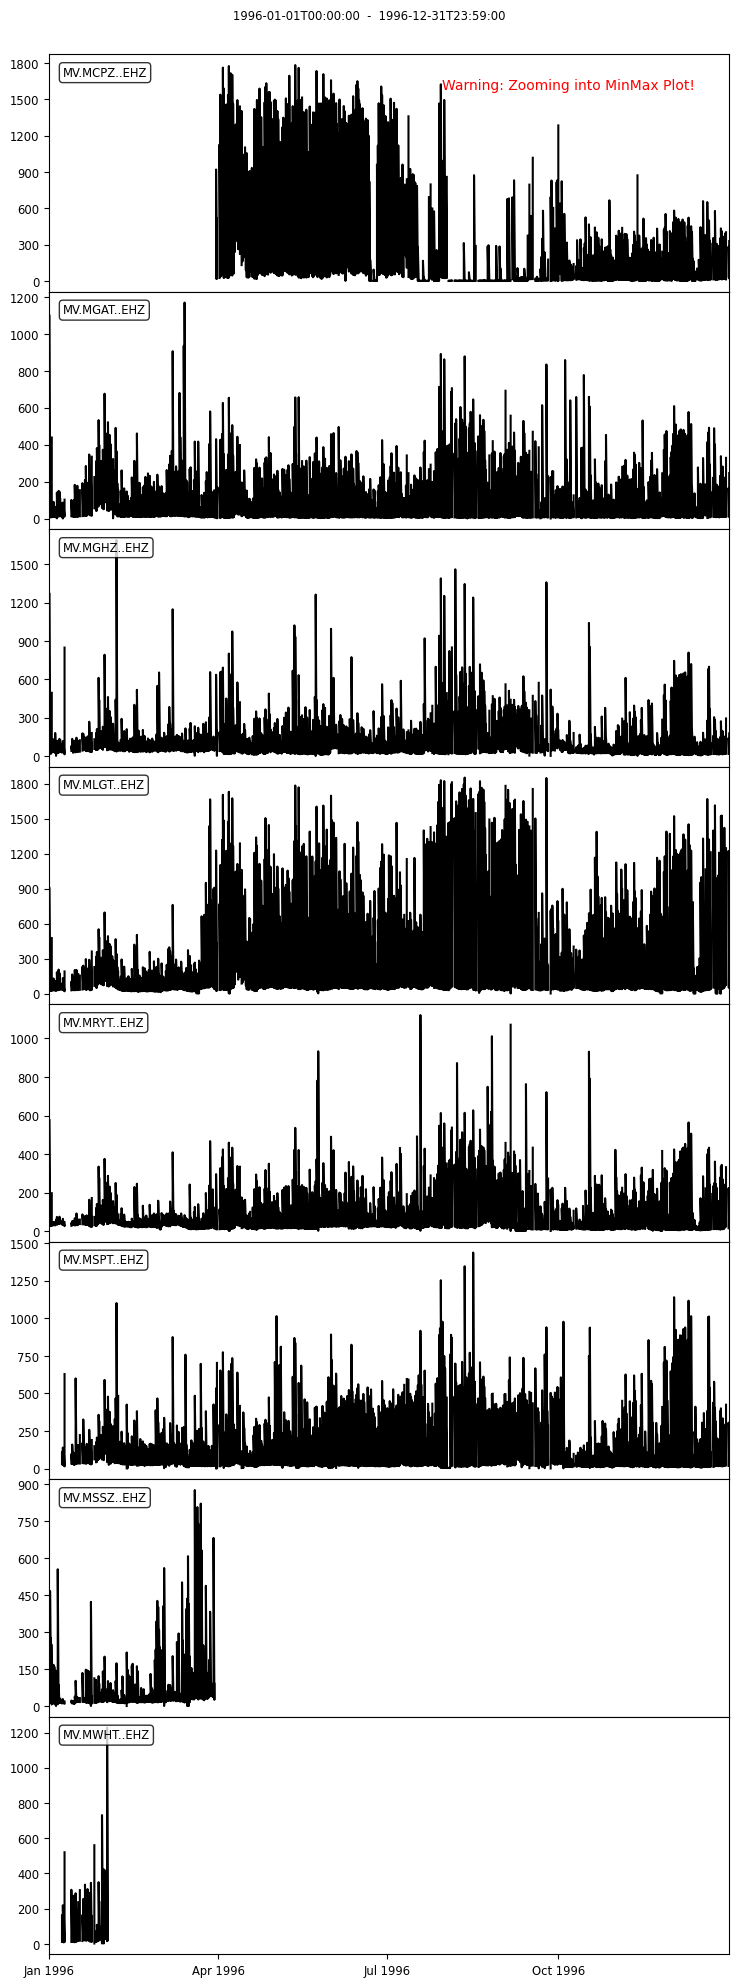

In [6]:
import os
import sys
import time
import obspy
sys.path.append('../lib')
from FLOVO import RSAM

RSAM_DIR = '../../data/continuous/RSAM'
RSAM_BINARY_DIR = os.path.join(RSAM_DIR, 'binary')

stime = obspy.core.UTCDateTime(1996,1,1,0,0,0)
etime = obspy.core.UTCDateTime(1996,12,31,23,59,59)
stations = ['MCPZ', 'MGAT', 'MGHZ', 'MLGT', 'MRYT', 'MSPT', 'MSSZ', 'MWHT']
time1 = time.time()
rsamObj = RSAM.readRSAMbinary(RSAM_BINARY_DIR, stations, stime, etime)
time2 = time.time()
print(f'Loaded in {time2-time1} s')

rsamObj.plot()

### 1.4 Converting legacy RSAM binary files to modern RSAM CSV/Pickle files
Since we have already read the binary files into a (single) RSAM object, writing them to modern RSAM data format is as simple as:

In [ ]:
rsamObj.write(RSAM_DIR, ext='pickle')

### 1.5 Exploring RSAM objects

In [7]:
help(rsamObj)

print(rsamObj)

print('RSAM dataframe for one Trace id (net.sta.loc.chan):')
print(rsamObj.dataframes['MV.MLGT..EHZ'].head())

Help on RSAM in module FLOVO object:

class RSAM(builtins.object)
 |  RSAM(dataframes=None, stream=None, sampling_interval=60.0, filter=[0.5, 18.0], bands={'VLP': [0.02, 0.2], 'LP': [0.5, 4.0], 'VT': [4.0, 18.0]})
 |  
 |  Methods defined here:
 |  
 |  __init__(self, dataframes=None, stream=None, sampling_interval=60.0, filter=[0.5, 18.0], bands={'VLP': [0.02, 0.2], 'LP': [0.5, 4.0], 'VT': [4.0, 18.0]})
 |      Create an RSAM object 
 |      
 |      Optional name-value pairs:
 |          dataframes: Creates an RSAM object using these dataframes. Used by downsample() method, for example. Default: None.
 |          stream: Creates as RSAM object from this ObsPy.Stream object.
 |          sampling_interval: Compute RSAM data using this sampling interval (in seconds). Default: 60
 |          filter: list of two floats, representing fmin and fmax. Default: [0.5, 18.0]. Set to None if no filter wanted.
 |          bands: a dictionary of filter bands and corresponding column names. Default:

## 2. Modern approach to computing RSAM data

We don't nned to use specialist hardware these days to compute "RSAM data", or the BOB program to visualize "RSAM data": we can use Python and ObsPy! 

In Python/ObsPy code, the equation above is just:

```python
r = np.mean(np.absolute(tr.data))
```
where tr is a 1-minute long ObsPy Trace object. This calculation is repeated for each 1-minute time window. It's also a good idea to ```detrend``` each Trace first, to eliminate any offset or drift.

The loop over 1-minute time windows can be vectorized using ```tr.data.reshape()```, which makes it faster. And why limit ourselves to 1-minute time windows, other good choices might be 1-second, 10-seconds, (1-minute), 10-minutes, 1-hour.

And since we want a modern RSAM system, why just calculate the mean of each time window? We can compute other statistics too, including:
- max (better for highlighting earthquakes)
- median (better for eliminating spikes and highlighting "tremor")
- mean in different frequency bands, e.g.:
  - 0.02 - 0.2 Hz for highlighting very-long-period (VLP) seismicity
  - 0.5 - 4.0 Hz for highlighting long-period (LP) seismicity
  - 4.0 - 18.0 Hz for highlighting volcano-tectonic (VT) seismicity
- frequency ratio: $log_2 (VT / LP)$ after Buurman & West (2010) and Rodgers et al. (2015)

And rather than store in binary files, we convenient use Pandas dataframes and save data to CSV or Pickle files.

References:
- Buurman, H., and West, M.E., 2010. Seismic precursors to volcanic explosions during the 2006 eruption of Augustine Volcano, in Power, J.A., Coombs, M.L., and Freymueller, J.T., eds., The 2006 eruption of Augustine Volcano, Alaska: U.S. Geological Survey Professional Paper 1769. https://pubs.usgs.gov/pp/1769/chapters/p1769_chapter02.pdf
- Rodgers, M. et al. 2015. Stable and unstable phases of elevated seismic activity at the persistently restless Telica Volcano, Nicaragua, J. Volcanol. Geotherm. Res., 90. https://doi.org/10.1016/j.jvolgeores.2014.11.012 https://doi.org/10.1016/j.jvolgeores.2014.11.012

## 2.1 Computing RSAM data for 1-week of digital seismic network data from Montserrat

To illustrate how to compute RSAM data for longer sequences of data, here is a fully worked example for Montserrat from February 26 to March 4, 2001. We will load raw seismic data in 1-day chunks from a SeisComP Data Structure (SDS) archive, and then compute corresponding 1-minute RSAM data.

First we import all the necessary modules and set some constants that help with loading & saving data:

In [1]:
import os
import sys
import time
import obspy
from obspy.clients.filesystem.sds import Client as sdsclient

PROJECT_DIR = os.path.join('..','..')
LIB_DIR = os.path.join(PROJECT_DIR,'src','lib')
sys.path.append(LIB_DIR)
from FLOVO import RSAM

CONTINUOUS_DATA_DIR = os.path.join(PROJECT_DIR, 'data', 'continuous')
SDS_DIR = os.path.join(CONTINUOUS_DATA_DIR, 'SDS')
RSAM_DIR = os.path.join(CONTINUOUS_DATA_DIR, 'RSAM')

#####################################################################################

mySDSclient = sdsclient(SDS_DIR)
startTime = obspy.core.UTCDateTime(2001,2,26,0,0,0)
endTime = obspy.core.UTCDateTime(2001,3,4,0,0,0)
secondsPerDay = 60 * 60 * 24
numDays = (endTime-startTime)/secondsPerDay

Second, we loop over each day, loading data from all stations in the stMV (and ObsPy.Stream) and then computing RSAM, and saving RSAM data to pickle files. This might take 1-2 minutes, depending on your computer.

In [ ]:
daytime = startTime
while daytime < endTime:
    time1 = time.time()
    print(f'Loading Stream data for {daytime}')
    stMV = mySDSclient.get_waveforms("MV", "*", "*", "[SBEHCD]*", daytime, daytime+secondsPerDay)
    print(f'- got {len(stMV)} Trace ids') 

    print(f'Computing RSAM metrics for {daytime}, and saving to pickle files')
    rsamMV24h = RSAM(stream=stMV, sampling_interval=60)
    rsamMV24h.write(RSAM_DIR, ext='pickle')
    
    daytime += secondsPerDay

    time2=time.time()
    print(f"- day took {time2-time1} seconds")

del mySDSclient

Next, we will load the RSAM data we just computed and saved, and print the RSAM object.

In [2]:
rsamMV = RSAM.readRSAMfile(startTime, endTime, RSAM_TOP=RSAM_DIR)
print(rsamMV)

Reading  ../../data/continuous/RSAM/RSAM_MV.MBMH..EHE_2001_60s.pickle
Reading  ../../data/continuous/RSAM/RSAM_MV.MBBY..BHN_2001_60s.pickle
Reading  ../../data/continuous/RSAM/RSAM_MV.MBRY..BHE_2001_60s.pickle
Reading  ../../data/continuous/RSAM/RSAM_MV.MBSS..EHZ_2001_60s.pickle
Reading  ../../data/continuous/RSAM/RSAM_MV.MBWH..EHZ_2001_60s.pickle
Reading  ../../data/continuous/RSAM/RSAM_MV.MBLG..EHZ_2001_60s.pickle
Reading  ../../data/continuous/RSAM/RSAM_MV.MBBY..BHZ_2001_60s.pickle
Reading  ../../data/continuous/RSAM/RSAM_MV.MBGH..BHE_2001_60s.pickle
Reading  ../../data/continuous/RSAM/RSAM_MV.MBGB..BHE_2001_60s.pickle
Reading  ../../data/continuous/RSAM/RSAM_MV.MBMH..EHN_2001_60s.pickle
Reading  ../../data/continuous/RSAM/RSAM_MV.MBLG..BDF_2001_60s.pickle
Reading  ../../data/continuous/RSAM/RSAM_MV.MBGH..BHZ_2001_60s.pickle
Reading  ../../data/continuous/RSAM/RSAM_MV.MBBY..BHE_2001_60s.pickle
Reading  ../../data/continuous/RSAM/RSAM_MV.MBRY..BHN_2001_60s.pickle
Reading  ../../data/

In addition to 'mean', 8 other RSAM metrics are available. These are 'min', 'max', 'median', 'std', 'VLP', 'LP', 'VT', and 'specratio'. And we also see the sampling interval is 60 s, and the date/time range of the RSAM object goes from 2001/02/26 00:00 to 2001/03/30 14:42.

Finally, we will plot some of these metrics:

In [ ]:
rsamMV_Z = rsamMV.select(component='Z')
rsamMV_Z.plot(metrics=['median'])

dataframes found. ignoring other arguments.


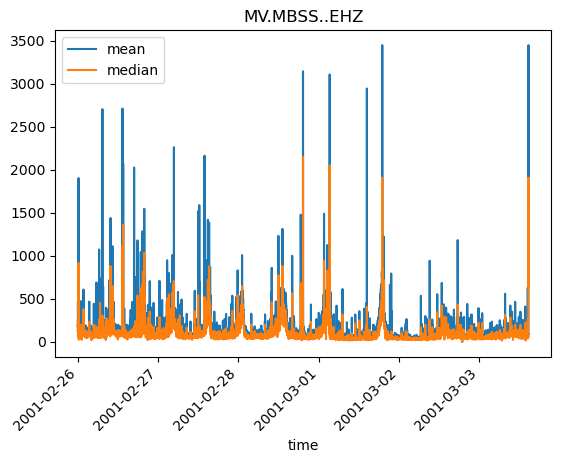

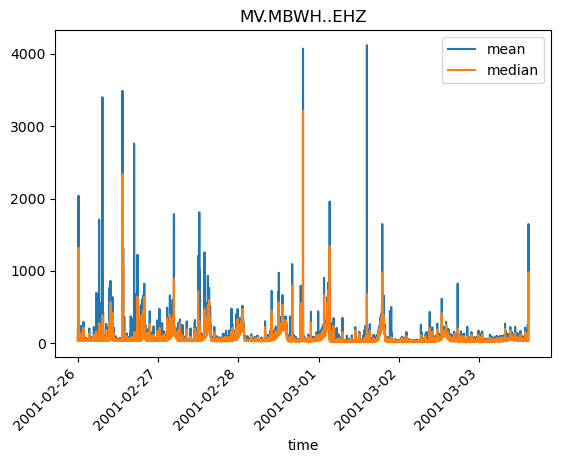

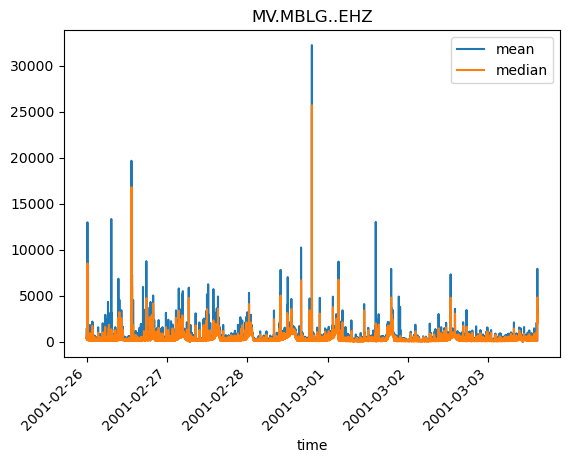

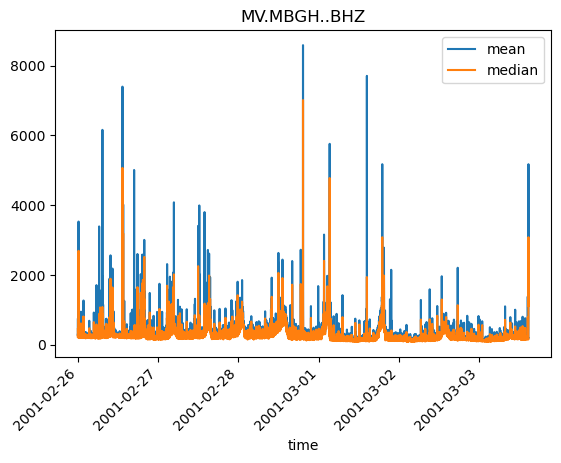

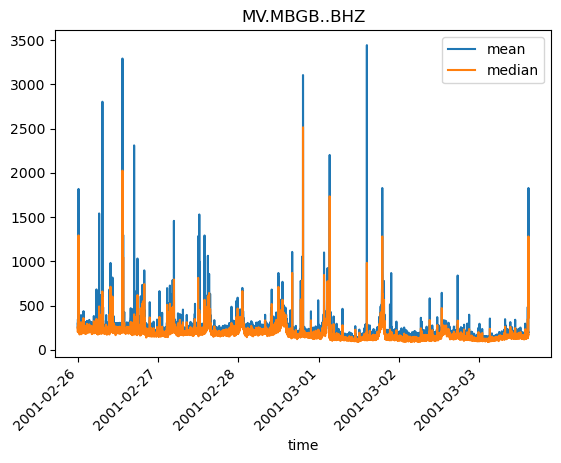

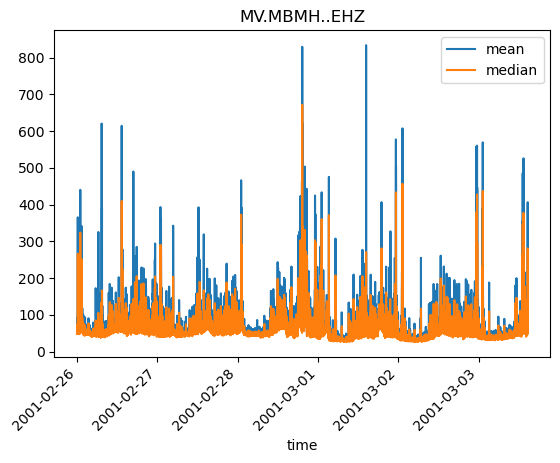

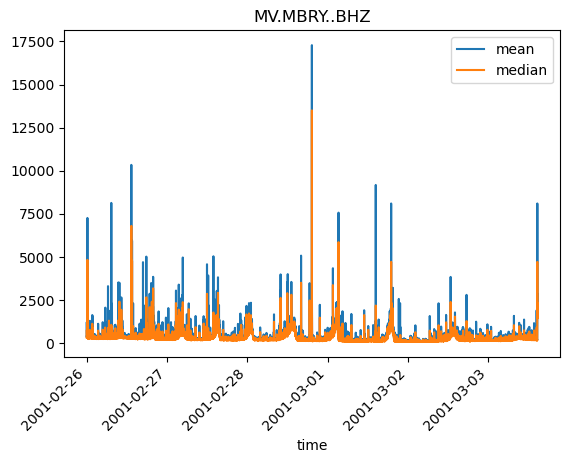

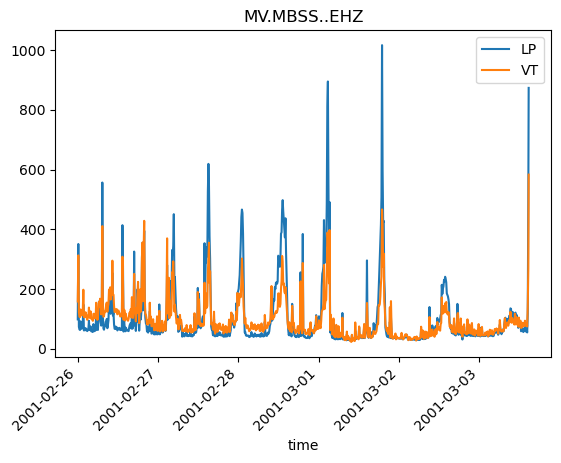

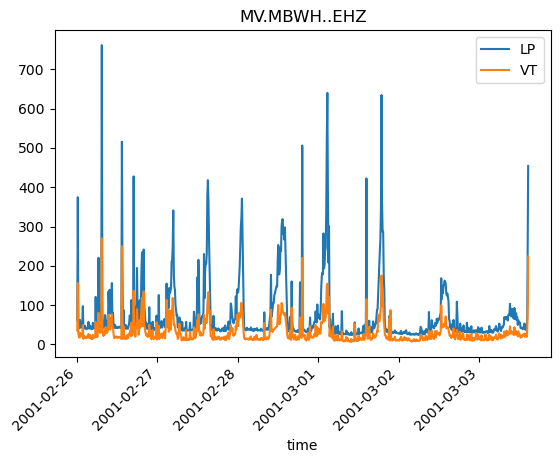

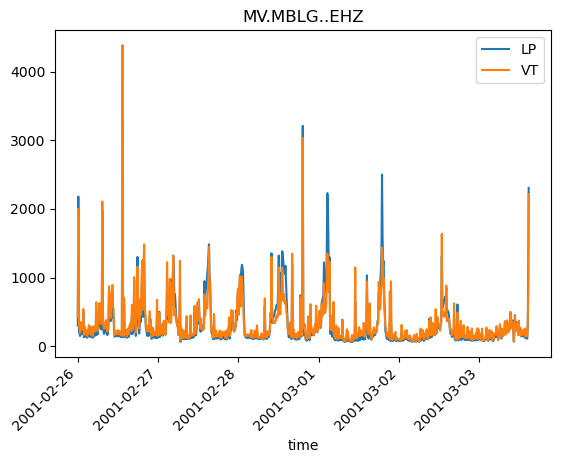

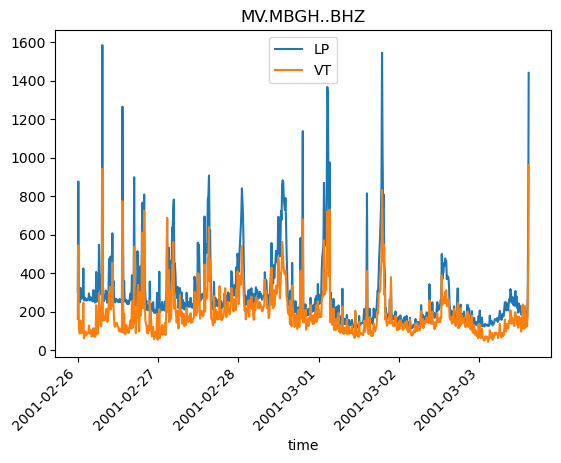

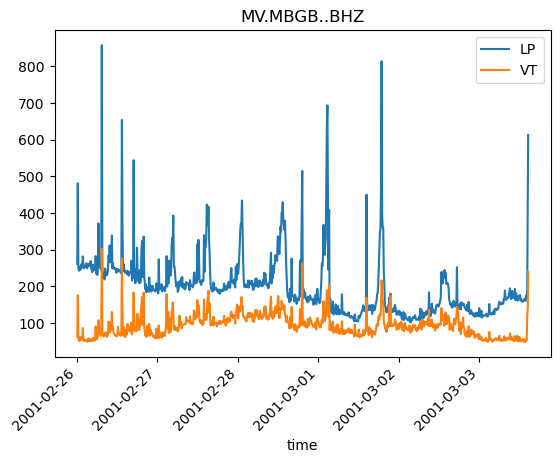

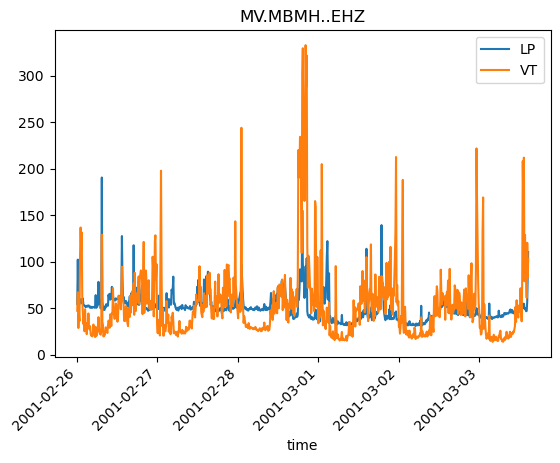

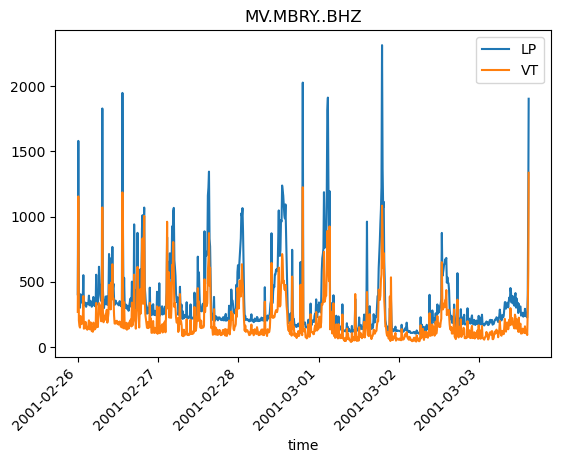

In [5]:
# drop IDs that don't look good
rsamMV_Z.drop('MV.MBBY..BHZ')
rsamMV_Z.drop('MV.MBMV..EHZ')

# downsample from 1-minute to 10-minutes
rsamMV_Zhourly = rsamMV_Z.downsample(new_sampling_interval=600)

# plot mean & median, then LP and VT
rsamMV_Z.plot(metrics=['mean', 'median'], kind='line')
rsamMV_Zhourly.plot(metrics=['LP', 'VT'], kind='line')

In [ ]:
rsamMV.plot(metrics=['specratio'], equal_scale=True)

# Exercise 1: make this exercise 2? put Montserrat example here?
For this exercise, we are going to plot RSAM data recorded by the original RSAM system installed at Montserrat Volcano Observatory (MVO) that was installed in July 1995 by VDAP scientists. Specifically, we will look at data from summer 1996, which was my first time at MVO.

## 1.1 First we do some imports, and set some constants

In [ ]:
import os
import sys
sys.path.append('../../lib')
import FLOVO
import obspy
RSAM_DIR = '../../data/continuous/RSAM'
RSAM_BINARY_DIR = os.path.join(RSAM_DIR, 'binary')

## 1.2. Convert RSAM binary files
The original RSAM system recorded 1-minute RSAM data in binary files with a 4-byte float for each sample, for every minute of the year. 
Let us convert these files so we never have to bother with these binary files again. So we will read the whole year of 1996.

In [ ]:
stime = obspy.core.UTCDateTime(1996,1,1,0,0,0)
etime = obspy.core.UTCDateTime(1996,12,31,23,59,59)
stations = ['MCPZ', 'MGAT', 'MGHZ', 'MLGT', 'MRYT', 'MSPT', 'MSSZ', 'MWHT']
rsamObj = FLOVO.readRSAMbinary(RSAM_BINARY_DIR, stations, stime, etime)
#rsamObj.write(RSAM_DIR, ext='csv')

The MVO network in 1996 didn't use modern SEED naming convention (network.station.location.channel or 'NSLC'), so here a network of 'MV' had been added, and the channel name has been set to 'EHZ' where 'E' indicates the original data were recorded at 100 Hz sampling rate, 'H' indicates seismic data, and 'Z' indicates a vertical component seismic sensor. 

'60s' has also been appended to the filename to indicate the sampling interval for the RSAM data. 

In memory, data for each station is stored in a pandas DataFrame, and on disk as a CSV file, which allows for easy browsing. 

To illustrate, next we will:

- print the RSAM object
- print the pandas DataFrame corresponding to id='MV.MLGT..EHZ'
- inspect the corresponding CSV file
- plot() the RSAM object

In [ ]:
print('RSAM object:')
print(rsamObj)systems

print('\nDataFrame:')
print(rsamObj.dataframes['MV.MLGT..EHZ'].head())

print('\nCSV file:')
os.system('head ../../data/continuous/RSAM/RSAM_MV.MLGT..EHZ_1996_60s.csv')


Each of these provides similar information. There are just two columns, which are 'time', and 'mean'. 
- 'time' is in Unix epoch seconds (since 1970-01-01 00:00:00)
- 'mean' just holds the mean seismic amplitude within that 60-s time window (Sampling Interval=60.0s)

# 1.3 Reading a subset of the data we just saved, and plotting an RSAM object
Next we will re-read (from disk) the RSAM data from 1996-02-15 to 1996-10-12, and then plot the data. By default, the plot() method will convert RSAM dataframes into an ObsPy Stream object, so it can be plotted in a familiar way. 

In [ ]:
startt = obspy.core.UTCDateTime(1996,2,15)
endt = obspy.core.UTCDateTime(1996,10,12)
rsamObj = FLOVO.readRSAMfile(startt, endt, trace_ids=['MV.MLGT..EHZ', 'MV.MGAT..EHZ', 'MV.MRYT..EHZ', 'MV.MGHZ..EHZ'], RSAM_TOP=RSAM_DIR, ext='csv')
rsamObj.plot()   

These RSAM plots above show the following general features:
1. Low seismicity in February and March.
2. An increase in seismicity around April 1st persists throughout to June. This period included the first pyroclastic density current (PDC) that reached the ocean on May 12, 1996.
3. A more significant increase in activity about 2/3rds of the way through July 1996. This was a time period in which the seismicity and the lava dome extrusion rate significantly increased, leading to numerous PDCs that reached the ocean, and even travelled for some distance upon the water. The increase is particularly noticeable on MV.MLGT..EHZ (3rd trace) as this was close to the Tar River Valley, where most PDCs were directed.
4. A sharp drop in seismicity from September 18, 1996, onwards.

These features may be more obvious if we smooth the data, which we can do with the RSAMmetrics.smooth() method:

In [ ]:
print('rsamObj:\n',rsamObj)
rsamObjHourly = rsamObj.copy()
rsamObjHourly.smooth(binsize=3600) 
print('rsamObjHourly:\n',rsamObjHourly)
rsamObjHourly.plot()

## 1.4 Trim, and Plot 1-minute RSAM data in summer 1996

Let us zoom in on the hourly data we smoothed earlier. We can do this with the trim() method, followed by plot().
trim() is done inplace, i.e. the original RSAM object is replaced.


In [ ]:
startt = obspy.core.UTCDateTime(1996,7,15)
endt = obspy.core.UTCDateTime(1996,9,1)
rsamObjHourly.trim(starttime=startt, endtime=endt)
rsamObjHourly.plot(kind='stream', equal_scale=False)   

There are various periods here where there seem to by cycles in RSAM. Let us look at early August period in more detail.


In [ ]:
rsamObjMidJuly = rsamObj.copy()
rsamObjMidJuly.trim(starttime=obspy.core.UTCDateTime(1996,8,1), endtime=obspy.core.UTCDateTime(1996,8,8))
rsamObjMidJuly.plot(kind='stream', equal_scale=False) 

These are remarkable cycles in RSAM. They appear to be about 4-6 hours apart. This is a phenomenon called "banded tremor". During these tremor bands, visual observations indicated that the lava dome was extruding at particularly high rates (up to 20m^3 was one estimate I heard), and at the peak of each cycle there was often ash venting. I proposed that the tremor bands were indicated of pressure cycles within the conduit - but caused by what? 
One suggestion is that the magma rises up the conduit in a stick-slip fashion. Basically, it gets stuck for a while, as the pressure builds below, and then shear fractures, allowing magma to suddenly extrude very quickly. 

Can we use some ObsPy STA/LTA detection tools to detect these tremor bands, in the same way we normally detect much shorter transient events, but just with longer STA/LTA settings? Let us try first on a single NSLC. This is based on examples at https://docs.obspy.org/tutorial/code_snippets/trigger_tutorial.html, except we use longer STA and LTA time windows (15 and 100 minutes respectively), and we add a despiking step which attempts to remove transient events lasting a minute or less from the data before running the STA/LTA:



In [ ]:
from obspy.signal.trigger import plot_trigger, classic_sta_lta, recursive_sta_lta
st = rsamObjMidJuly._to_stream()
st.trim(obspy.core.UTCDateTime(1996,8,3), obspy.core.UTCDateTime(1996,8,5))

def despike(st, thresh=1.5):
    for tr in st:
        x = tr.data
        for i in range(len(x)-2):
            if x[i+1]>x[i]*thresh and x[i+1]>x[i+2]*thresh:
                x[i+1] = (x[i] + x[i+2])/2
        tr.data = x
despike(st)
trace = st[2].copy()
trace.plot();

sta_minutes = 15
lta_minutes = 100
threshON = 1.0
threshOFF = 0.3

cft = recursive_sta_lta(trace.data, sta_minutes, lta_minutes)

plot_trigger(trace, cft, threshON, threshOFF)

That seems to work quite well. Now let us try an event detector that uses several NSLC at once.

In [ ]:
from obspy.signal.trigger import coincidence_trigger
from pprint import pprint
import numpy as np

threshStations = 3

trig = coincidence_trigger("recstalta", threshON, threshOFF, st, threshStations, sta=sta_minutes*60, lta=lta_minutes*60, max_trigger_length=2*lta_minutes*60, delete_long_trigger=True)

#pprint(trig)

lendata = len(st[0].data)
trdata = np.zeros( (lendata, ) )
detectionTrace = obspy.Trace( data = trdata ) 
detectionTrace.id = 'XX.DETEC..TED'
detectionTrace.stats.starttime = st[0].stats.starttime
detectionTrace.stats.sampling_rate = st[0].stats.sampling_rate
t = detectionTrace.times('utcdatetime')
for thistrig in trig:
    t0 = thistrig['time']
    t1 = (thistrig['time'] + thistrig['duration'])
    indices = np.where((t >= t0) & (t <= t1))
    #print(t0, t1, indices)
    detectionTrace.data[indices] = 1 #thistrig['duration']

st3 = st.copy()
st3.append(detectionTrace)
st3.plot(equal_scale=False);

detection_ON_times = [thistrig['time'].timestamp for thistrig in trig]
detection_intervals_minutes = np.diff(np.array(detection_ON_times))/60
for i,d in enumerate(detection_intervals_minutes):
    print(f"detection ON time for band {i}: {trig[i]['time']}, duration: {trig[i]['duration']/60} mins")
    print(f"- interval (mins): {detection_intervals_minutes[i]}")
print(f"detection ON time for band {i+1}: {trig[i+1]['time']}")

The bottom trace here corresponds to the detected events, and you can see they line up pretty well with the tremor bands, except the first one was missed.

This is similar to the banded tremor alarm system I wrote at MVO in 2000. And using this approach we can forecast the timing of the next tremor band. As it was the MVO Seismologist's job to manage the Operations Room, which included continuous seismic monitoring and two-way radio communications with MVO field crews, it was useful to predict tremor bands, as these were periods of heightened activity when field crews should not be on the flanks of the volcano.




In [ ]:
# further isolate bands by stacking and applying detection mask
stackedTrace = st3[0].copy()
stackedTrace.id = 'MV.STACK..EHZ'
for tr in st3[1:-1]:
    stackedTrace.data += tr.data
stackedTrace.plot();

maskedTrace = stackedTrace.copy()
#maskedTrace.stats.station = 'MASK'
#maskedTrace.data *= st3[-1].data

# find peak value and peak time during each band
import pandas as pd
lod = []
for thistrig in trig:
    bandstarttime = thistrig['time']
    bandendtime = thistrig['time'] + thistrig['duration']
    bandTrace = maskedTrace.copy().trim(starttime=bandstarttime, endtime=bandendtime)
    bandpeaktime = bandstarttime + bandTrace.data.argmax() * tr.stats.delta
    band = {'starttime':bandstarttime, 'waxtime':bandpeaktime-bandstarttime, \
            'peaktime':bandpeaktime, 'wanetime':bandendtime-bandpeaktime, 'endtime':bandendtime, 'duration':thistrig['duration']}
    lod.append(band)


bandDf = pd.DataFrame(lod)
print(bandDf)

predicted = []
for col in ['starttime', 'peaktime', 'endtime']:
    interval = (bandDf.iloc[-1][col] - bandDf.iloc[0][col]) / (len(bandDf)-1) 
    predicted.append(bandDf.iloc[-1][col] + interval)
print('\nNext band prediction:')
print(' - start: ',predicted[0])
print(' - peak:  ',predicted[1])
print(' - end:   ',predicted[2])

st5 = rsamObjMidJuly.copy()
st5.trim(starttime = obspy.core.UTCDateTime(1996,8,5,0,0,0), endtime = obspy.core.UTCDateTime(1996,8,5,3,0,0) )
st5.plot()

# Exercise 2: 
For this exercise, we are going to use continuous seismic data from Montserrat in late February/early March, 2001, and compute our own RSAM data.

# 2.2 Redoubt Volcano, Alaska, 2009

In [ ]:
# Now compute for Redoubt
stime = obspy.core.UTCDateTime(2009,3,22,22,0,0)
etime = obspy.core.UTCDateTime(2009,3,23,8,0,0)
from obspy.clients.filesystem.sds import Client as SDSCLIENT
myclient = SDSCLIENT('../../data/continuous/SDS')
stRD = myclient.get_waveforms("AV", "*", "*", "[HDESB]*", stime, etime)
#print(stRD.__str__(extended=True))

In [ ]:
# attempt to merge traces by rounding off the sampling rate
stRD.sort(['starttime', 'endtime', 'npts', 'network', 'station', 'location', 'channel'])
stRD2 = stRD.copy()
try:
    stRD2.merge(method=0, fill_value='interpolate')
except:
    stRD2 = obspy.core.Stream()
    for tr in stRD:
        try:
            tr.stats.sampling_rate=round(tr.stats.sampling_rate)
            tr.data[abs(tr.data)>10000]=0
            stRD2.append(tr)
            stRD2.merge(method=0, fill_value='interpolate')
            #print(tr)
        except:
            print(f"Cannot merge {tr}")
stRD2.plot(starttime=stime+4.8*3600, endtime=stime+5*3600, equal_scale=False);

In [ ]:
good_ids = ['AV.RDN..EHZ', 'AV.REF..EHZ', 'AV.REF..EHN', 'AV.REF..EHE', 'AV.RSO..EHZ', 'AV.RDWB..BHZ', 'AV.RDWB..BHN', 'AV.RDWB..BHE']
stRD3 = obspy.core.Stream()
for id in good_ids:
    stRD3.append(stRD2.select(id=id)[0])
importlib.reload(FLOVO)
r2 = FLOVO.RSAMmetrics(stream=stRD3, sampling_interval=60, filter=True)
r2.plot(kind='stream', metrics=['mean'])

In [ ]:
r2.plot(kind='stream', metrics=['specratio'])

In [ ]:
stRD4 = stRD3.copy().trim(starttime=stime+4.8*3600, endtime=stime+5*3600)
importlib.reload(FLOVO)
r3 = FLOVO.RSAMmetrics(stream=stRD4, sampling_interval=3, filter=True)
r3.plot(kind='stream');

## 2.3 Soufriere Hills Volcano, Montserrat, 2001

In [ ]:
import os
import sys
import obspy
from obspy.clients.filesystem.sds import Client as sdsclient

PROJECT_DIR = os.path.join('..','..')
LIB_DIR = os.path.join(PROJECT_DIR,'lib')
sys.path.append(LIB_DIR)
import FLOVO

CONTINUOUS_DATA_DIR = os.path.join(PROJECT_DIR, 'data', 'continuous')
SDS_DIR = os.path.join(CONTINUOUS_DATA_DIR, 'SDS')
RSAM_DIR = os.path.join(CONTINUOUS_DATA_DIR, 'RSAM')

#####################################################################################

mySDSclient = sdsclient(SDS_DIR)
startTime = obspy.core.UTCDateTime(2001,2,25,0,0,0)
endTime = obspy.core.UTCDateTime(2001,3,5,0,0,0)
secondsPerDay = 60 * 60 * 24
numDays = (endTime-startTime)/secondsPerDay

In [ ]:
tr2 = obspy.core.Trace(data=np.array(rsam_values))
tr2.stats.starttime = stime
tr2.stats.delta = time_window
tr2.id = tr.id
tr2.stats.channel = 'U' + tr.stats.channel[1:]

st = obspy.core.Stream([tr, tr2])
st.plot(equal_scale=False);

In [ ]:
print('median ',np.median(tr.data))
print('max ',np.max(tr.data))
print('std ',np.std(tr.data))
print('99th percentile ',np.percentile(tr.data, 99))

In [ ]:
t = trMBWH.times() # seconds from start of seismogram
udt = trMBWH.stats.starttime
time_window = 60 # 60-s time window
rsam_values = []
rsam_times = []
for startt in range(t[0], t[-1], time_window):
    tr_segment = trMBWH.copy().trim(starttime=udt+startt, endtime=udt+startt+time_window)
    m = np.mean(tr_segment.data)
    rsam_times.append(u+startt+time_window)
    rsam_values.append(m)

import matplotlib.pyplot as plt
plt.plot(rsam_times.datetime, rsam_values)


In [ ]:
daytime = startTime
while daytime < endTime:
    print(f'Loading Stream data for {daytime}')
    stMV = mySDSclient.get_waveforms("MV", "*", "*", "[SBEHCD]*", daytime, daytime+secondsPerDay)

    print(f'Computing RSAM metrics for {daytime}, and saving to CSV')
    rsamMV24h = FLOVO.RSAM(stream=stMV, sampling_interval=60)
    rsamMV24h.write(RSAM_DIR)
    
    daytime += secondsPerDay

del mySDSclient

print(f'Reading and Plotting {numDays} days of RSAM metrics')


rsamMV = FLOVO.readRSAMfile(startTime, endTime, trace_ids=None, RSAM_TOP=RSAM_DIR)
print(rsamMV)
rsamMV.plot(kind='stream', metrics=['median'])

In [ ]:
# add frequency index to RSAMmetrics
# add a 1/rsam plot for FFM
# add a way to compute RSAM for overlapping time bins - easy to do if say select 1 minute first, and then apply say a 10-point moving point filter